<a href="https://colab.research.google.com/github/jfink09/Deep-Learning/blob/main/Predicting_axis_with_total_axis_vs_AK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_excel('Abulafia-Koch - total net astigmatism 2.xlsx')
df2 = pd.read_excel('X_data-4.xlsx')
df3 = pd.read_excel('axis_train_set.xlsx').dropna()
df4 = pd.read_excel('Abulafia-Koch - total net astigmatism 2 2.xlsx')
#df3.fillna(df3.mean(), inplace=True)
#df4 = pd.read_excel('axis_test_set.xlsx')
#df4.fillna(df4.mean(), inplace=True)  # Replace NaN values with the mean
#df5 = pd.read_excel('Updated_Pred_axis.xlsx').dropna()

In [ ]:
df2

,X TCA Pred,Y TCA Pred,Axis Int,Total Corneal Cyl (reconstructed),Total Corneal Axis Final (reconstructed)
0,0.186787,0.006855,1.050955,0.186913,1.050955
1,-0.050369,0.103313,-32.004422,0.114937,57.995578
2,0.502143,-0.495156,-22.299301,0.705215,157.700699
3,0.336313,0.088617,7.380819,0.347792,7.380819
4,-0.823034,-0.176681,6.057920,0.841785,96.057920
...,...,...,...,...,...
15571,-2.352591,0.367291,-4.436743,2.381089,85.563257
15572,-0.282829,0.906642,-36.337293,0.949732,53.662707
15573,-0.280280,-0.363967,26.200620,0.459378,116.200620
15574,-0.908406,0.196684,-6.108429,0.929454,83.891571


In [ ]:
df3

,Age,Astig F (D):,Axis F:,Astig Total (D):,Axis Total,X ACA,Y ACA,Mag ACA,X TCA,Y TCA,Mag TCA,New Total Axis,New Total Axis.1
0,25,0.0,10.6,0.100000,7.500000,0.000000,0.000000,0.0,0.096593,0.025882,0.100000,7.500000,7.500000
1,25,0.3,78.8,0.200483,77.653694,-0.277364,0.114321,0.3,-0.182151,0.083752,0.200483,-12.346306,77.653694
2,27,0.7,150.9,0.643578,154.426149,0.368869,-0.594925,0.7,0.403726,-0.501197,0.643578,-25.573851,154.426149
3,27,0.2,14.5,0.294439,173.200000,0.174924,0.096962,0.2,0.286183,-0.069235,0.294439,-6.800000,173.200000
4,56,1.2,95.2,0.954078,99.805269,-1.180286,-0.216623,1.2,-0.898738,-0.320212,0.954078,9.805269,99.805269
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15596,49,3.0,85.9,2.401028,85.525321,-2.969329,0.427887,3.0,-2.371798,0.373507,2.401028,-4.474679,85.525321
15597,55,1.2,58.6,1.063793,49.019305,-0.548518,1.067300,1.2,-0.148761,1.053340,1.063793,-40.980695,49.019305
15598,55,0.7,109.4,0.480867,126.161590,-0.545537,-0.438623,0.7,-0.146014,-0.458163,0.480867,36.161590,126.161590
15599,51,1.3,85.0,0.900285,85.399821,-1.280250,0.225743,1.3,-0.888703,0.143944,0.900285,-4.600179,85.399821


In [ ]:
len(df1), len(df2), len(df4), len(df3)

(19502, 15576, 19502, 15576)

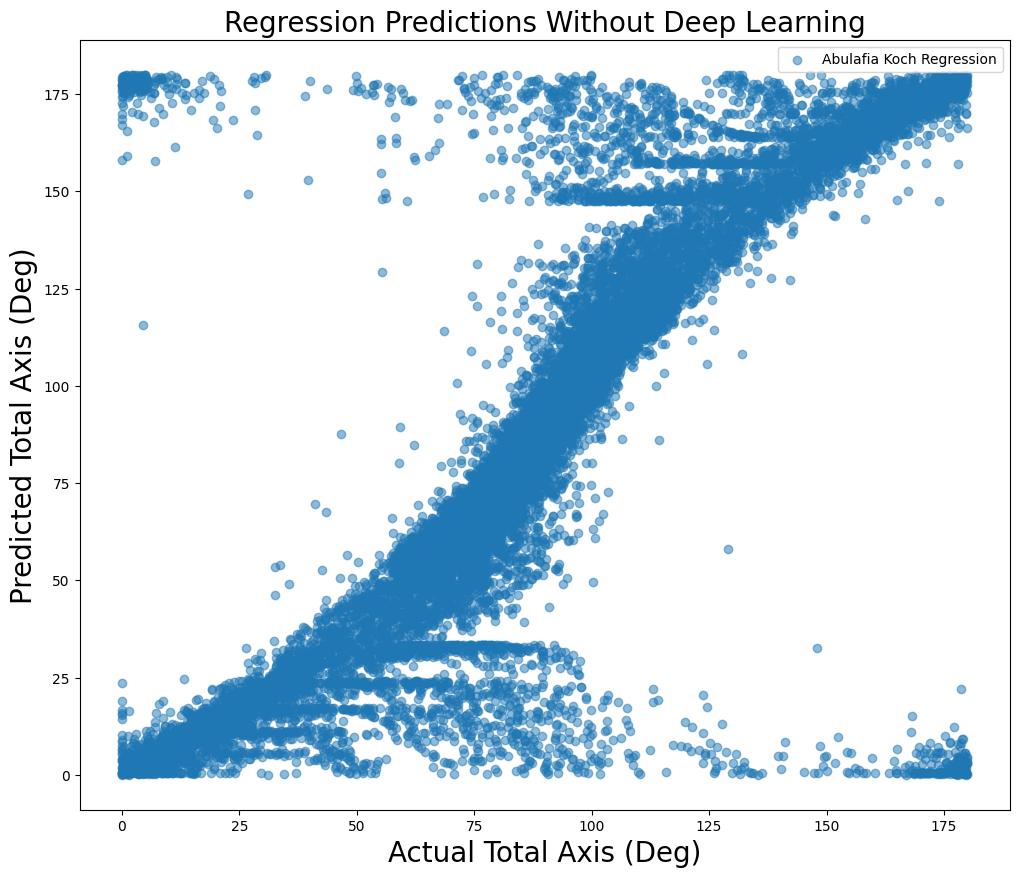

In [ ]:
fig = plt.subplots(figsize=(12,10))

# plot actual vs predicted values
plt.scatter(df4['Axis Total '],df4['Total Corneal Axis Final (reconstructed)'], alpha=0.5, label='Abulafia Koch Regression') #AK DATA

#plt.scatter(df2['F Mag'], df2['Astig Total (D):'], alpha=0.5, label='Humphrey Regression')
#plt.scatter(df2['Astig F (D):'], df2['Astig Total (D):'], alpha=0.5, label='Our Regression') # OUR DATA

#x_value = range(11)

# Calculate y values as equal to x
#y_value = [val for val in x_value]

# Plot the line graph
#plt.plot(x_value, y_value, color='#FF0000', linewidth=2)

#plt.xlim(0, 5)
#plt.ylim(0, 5)
plt.xlabel('Actual Total Axis (Deg)',size=20)
plt.ylabel('Predicted Total Axis (Deg)',size=20)
plt.title('Regression Predictions Without Deep Learning',size=20)
plt.legend()
plt.show()

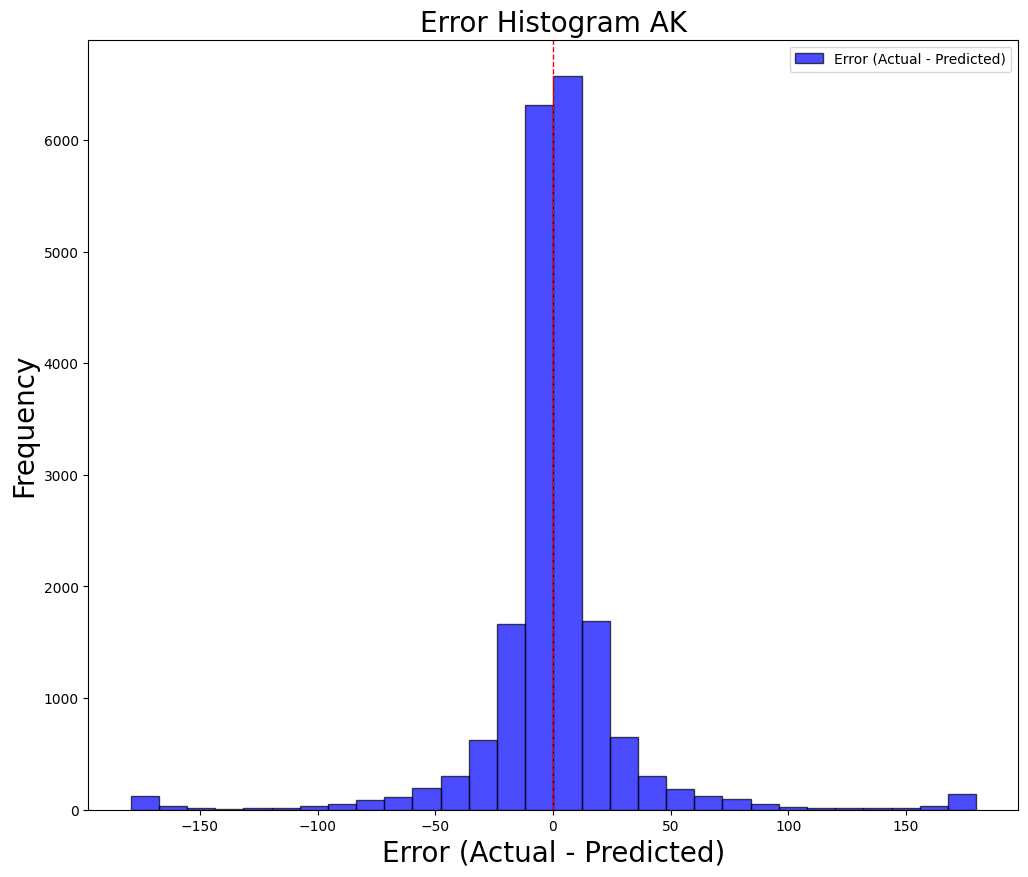

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df4 is your DataFrame

# Calculate the error (difference between actual and predicted)
error = df4['Axis Total '] - df4['Total Corneal Axis Final (reconstructed)']

# Create a histogram plot for the error
fig, ax = plt.subplots(figsize=(12, 10))
plt.hist(error, bins=30, color='blue', alpha=0.7, edgecolor='black', label='Error (Actual - Predicted)')

# Set labels and title
plt.xlabel('Error (Actual - Predicted)', size=20)
plt.ylabel('Frequency', size=20)
plt.title('Error Histogram AK', size=20)
plt.legend()
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)  # Add a vertical line at x=0 for reference
plt.show()

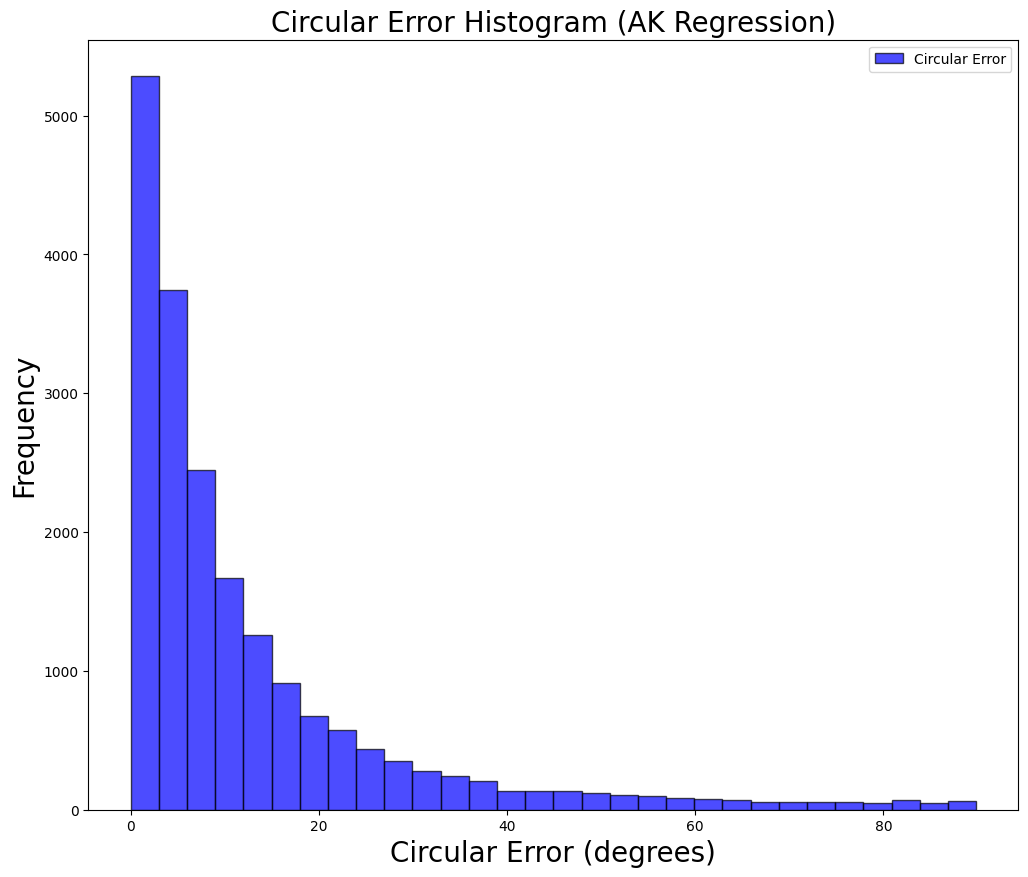

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df4 is your DataFrame

# Calculate the circular error (shortest angular distance) between actual and predicted
def circular_error(actual, predicted):
    error = np.abs(predicted - actual)
    return np.minimum(error, 180 - error)

# Calculate the circular error for the dataset
df4['Circular Error'] = circular_error(df4['Axis Total '], df4['Total Corneal Axis Final (reconstructed)'])

# Create a histogram plot for the circular error
fig, ax = plt.subplots(figsize=(12, 10))
plt.hist(df4['Circular Error'], bins=30, color='blue', alpha=0.7, edgecolor='black', label='Circular Error')

# Set labels and title
plt.xlabel('Circular Error (degrees)', size=20)
plt.ylabel('Frequency', size=20)
plt.title('Circular Error Histogram (AK Regression)', size=20)
plt.legend()
#plt.axvline(x=0, color='red', linestyle='--', linewidth=1)  # Add a vertical line at x=0 for reference
plt.show()

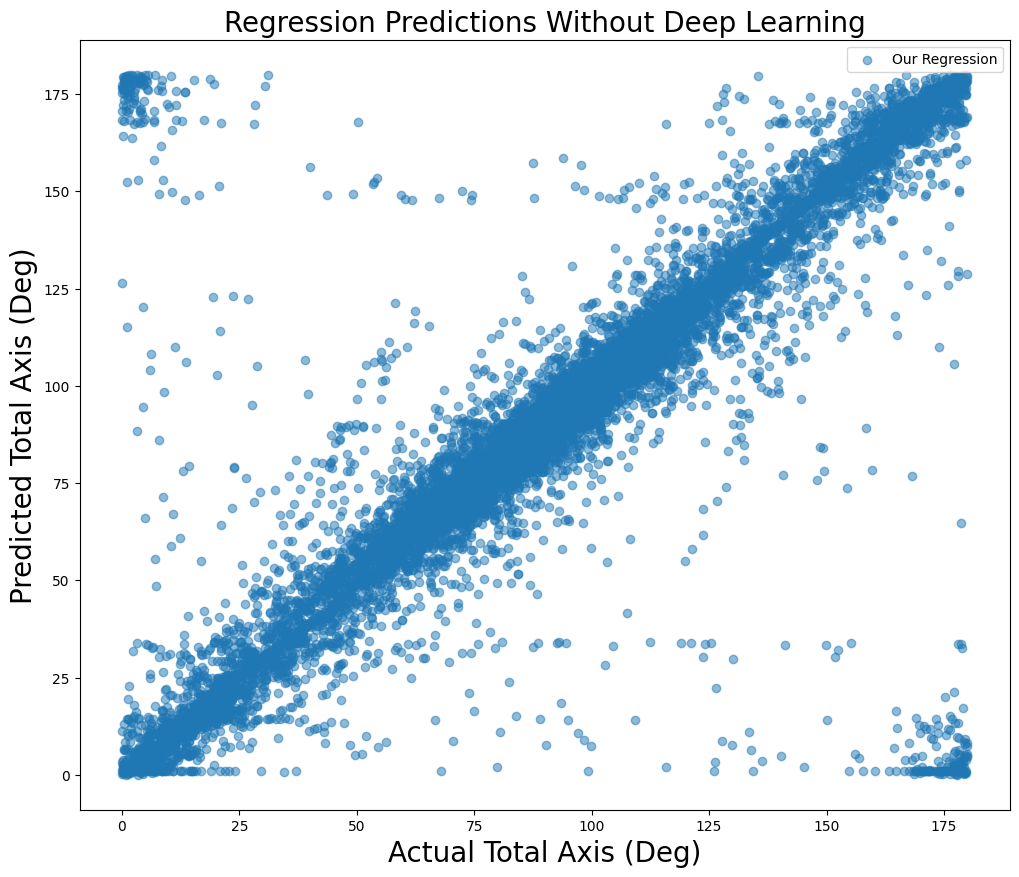

In [ ]:
fig = plt.subplots(figsize=(12,10))

# plot actual vs predicted values
#plt.scatter(df4['Axis Total '],df4['Total Corneal Axis Final (reconstructed)'], alpha=0.5, label='Abulafia Koch Regression') #AK DATA

#plt.scatter(df2['F Mag'], df2['Astig Total (D):'], alpha=0.5, label='Humphrey Regression')
plt.scatter(df3['Axis Total '], df2['Total Corneal Axis Final (reconstructed)'], alpha=0.5, label='Our Regression') # OUR DATA

#x_value = range(11)

# Calculate y values as equal to x
#y_value = [val for val in x_value]

# Plot the line graph
#plt.plot(x_value, y_value, color='#FF0000', linewidth=2)

#plt.xlim(0, 5)
#plt.ylim(0, 5)
plt.xlabel('Actual Total Axis (Deg)',size=20)
plt.ylabel('Predicted Total Axis (Deg)',size=20)
plt.title('Regression Predictions Without Deep Learning',size=20)
plt.legend()
plt.show()

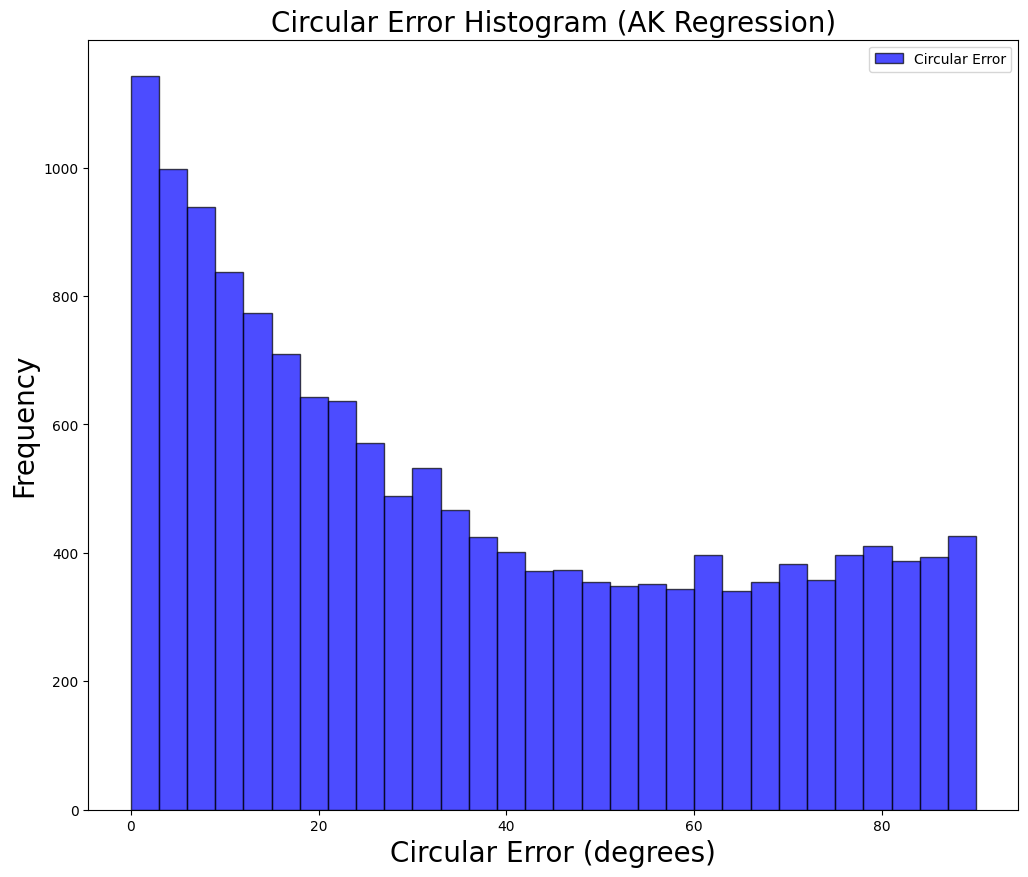

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df4 is your DataFrame

# Calculate the circular error (shortest angular distance) between actual and predicted
def circular_error(actual, predicted):
    error = np.abs(predicted - actual)
    return np.minimum(error, 180 - error)

# Calculate the circular error for the dataset
df2['Circular Error'] = circular_error(df3['Axis Total '], df2['Total Corneal Axis Final (reconstructed)'])

# Create a histogram plot for the circular error
fig, ax = plt.subplots(figsize=(12, 10))
plt.hist(df2['Circular Error'], bins=30, color='blue', alpha=0.7, edgecolor='black', label='Circular Error')

# Set labels and title
plt.xlabel('Circular Error (degrees)', size=20)
plt.ylabel('Frequency', size=20)
plt.title('Circular Error Histogram (AK Regression)', size=20)
plt.legend()
#plt.axvline(x=0, color='red', linestyle='--', linewidth=1)  # Add a vertical line at x=0 for reference
plt.show()

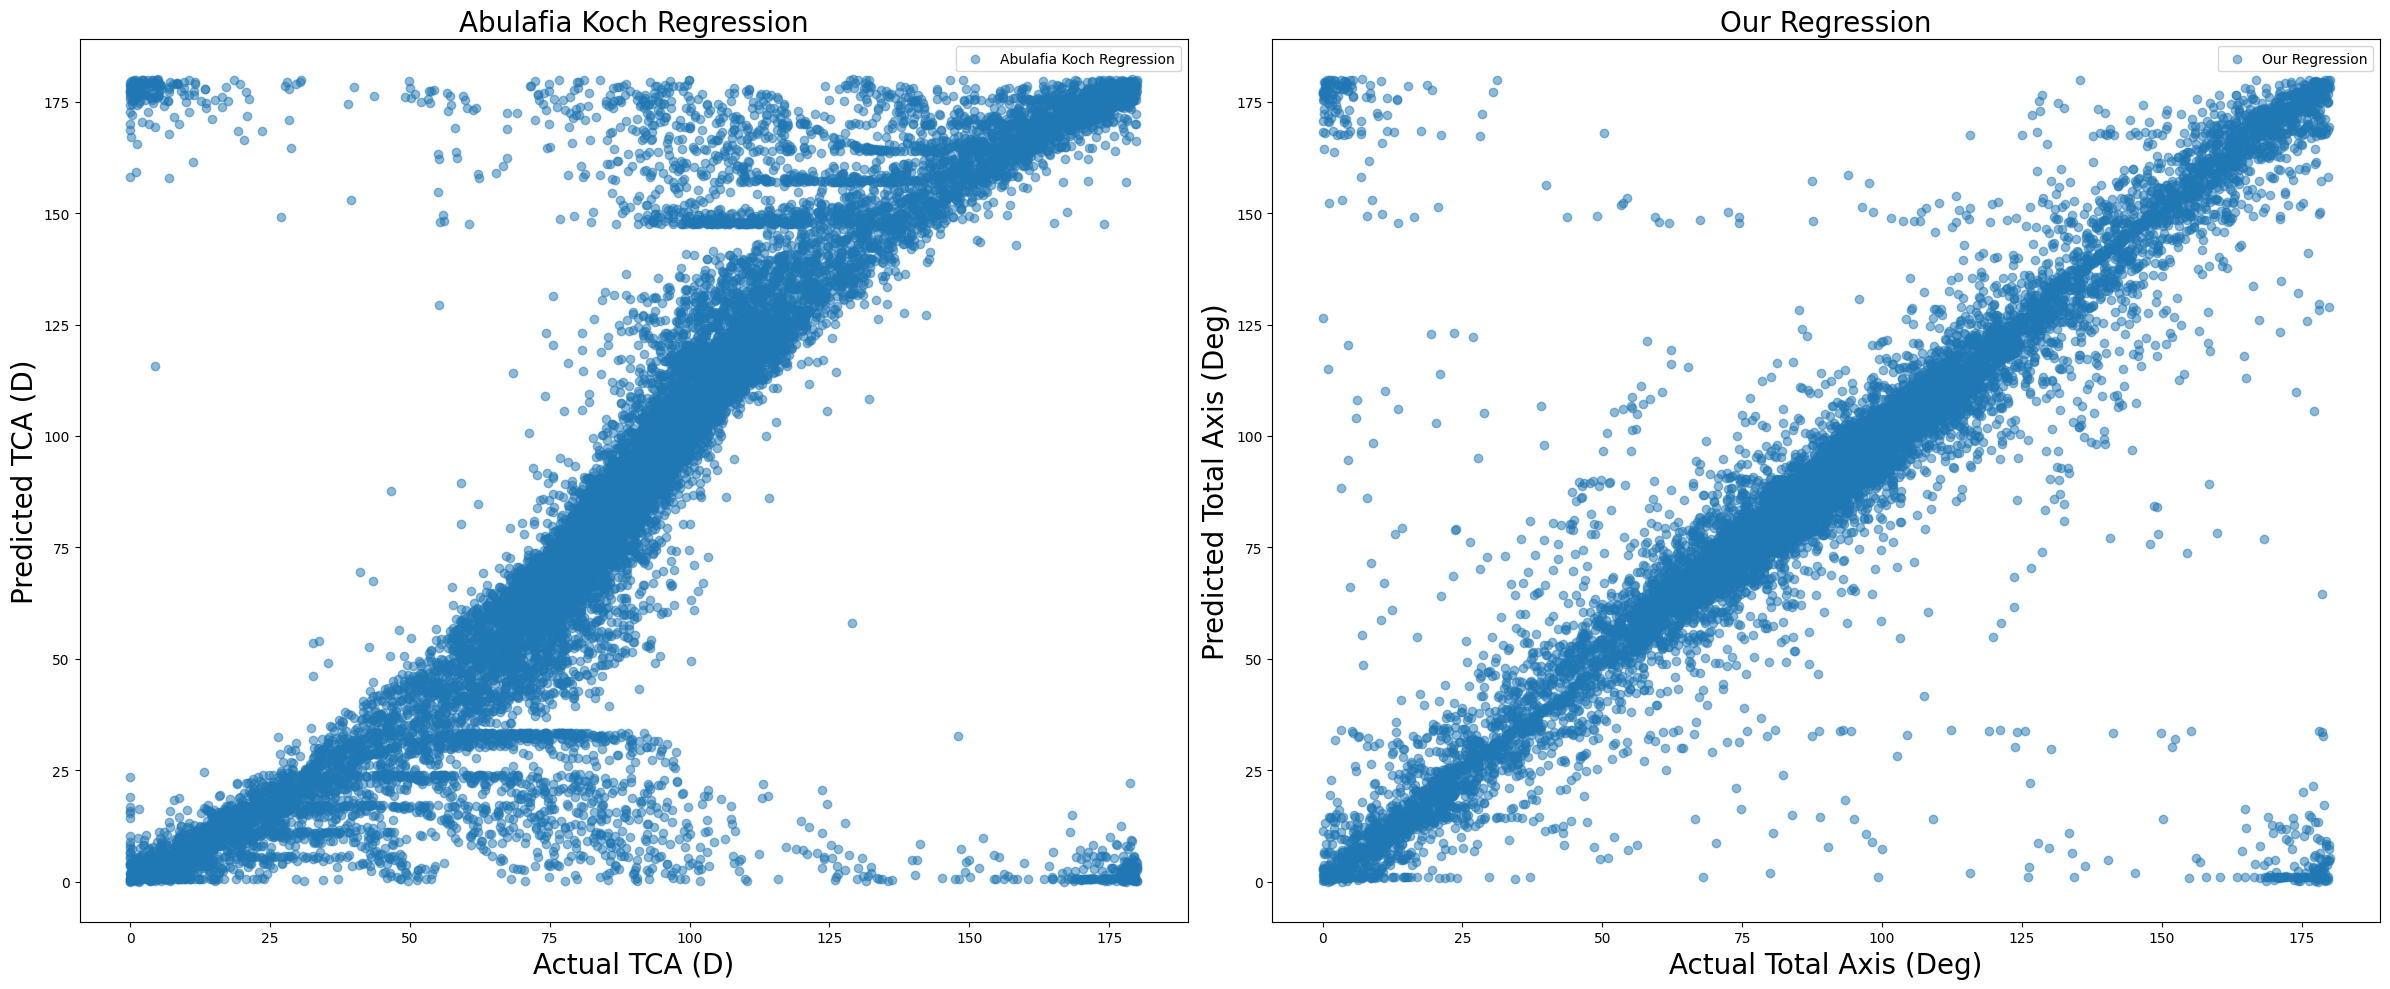

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots arranged in a single row and two columns
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# First subplot on the left
plt.sca(axes[0])
plt.scatter(df4['Axis Total '], df4['Total Corneal Axis Final (reconstructed)'], alpha=0.5, label='Abulafia Koch Regression')
plt.xlabel('Actual TCA (D)', size=20)
plt.ylabel('Predicted TCA (D)', size=20)
plt.title('Abulafia Koch Regression', size=20)
plt.legend()

# Second subplot on the right
plt.sca(axes[1])
plt.scatter(df3['Axis Total '], df2['Total Corneal Axis Final (reconstructed)'], alpha=0.5, label='Our Regression')
plt.xlabel('Actual Total Axis (Deg)', size=20)
plt.ylabel('Predicted Total Axis (Deg)', size=20)
plt.title('Our Regression', size=20)
plt.legend()

# Adjust the layout to avoid overlapping titles and labels
plt.tight_layout()

# Display the plots
plt.show()

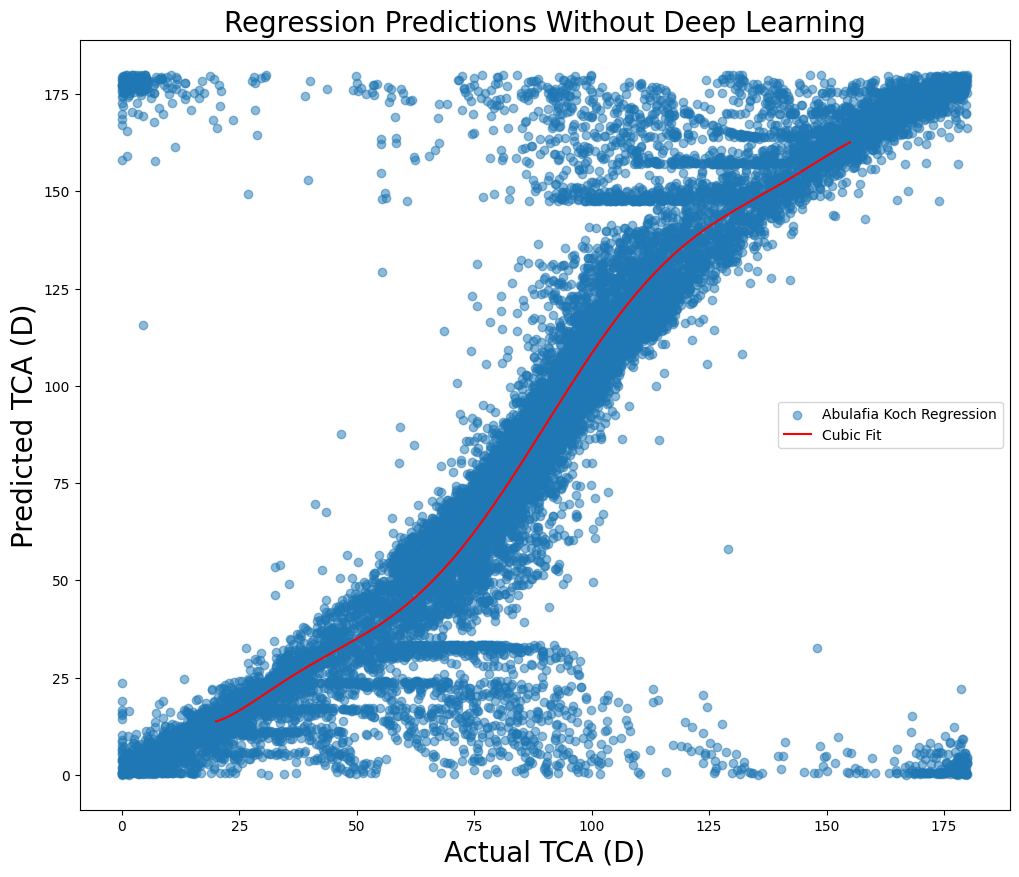

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df4 is your DataFrame

# Create a scatter plot
fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(df4['Axis Total '], df4['Total Corneal Axis Final (reconstructed)'], alpha=0.5, label='Abulafia Koch Regression')

# Fit a cubic polynomial to the data
coefficients = np.polyfit(df4['Axis Total '], df4['Total Corneal Axis Final (reconstructed)'], 7)
p = np.poly1d(coefficients)

# Generate a range of x values for the curve
x_range = np.linspace(20, 155, 200)

# Calculate the corresponding y values for the cubic curve
y_curve = p(x_range)

# Plot the cubic curve
ax.plot(x_range, y_curve, color='red', label='Cubic Fit')

# Set labels and title
ax.set_xlabel('Actual TCA (D)', size=20)
ax.set_ylabel('Predicted TCA (D)', size=20)
ax.set_title('Regression Predictions Without Deep Learning', size=20)
ax.legend()

# Show the plot
plt.show()

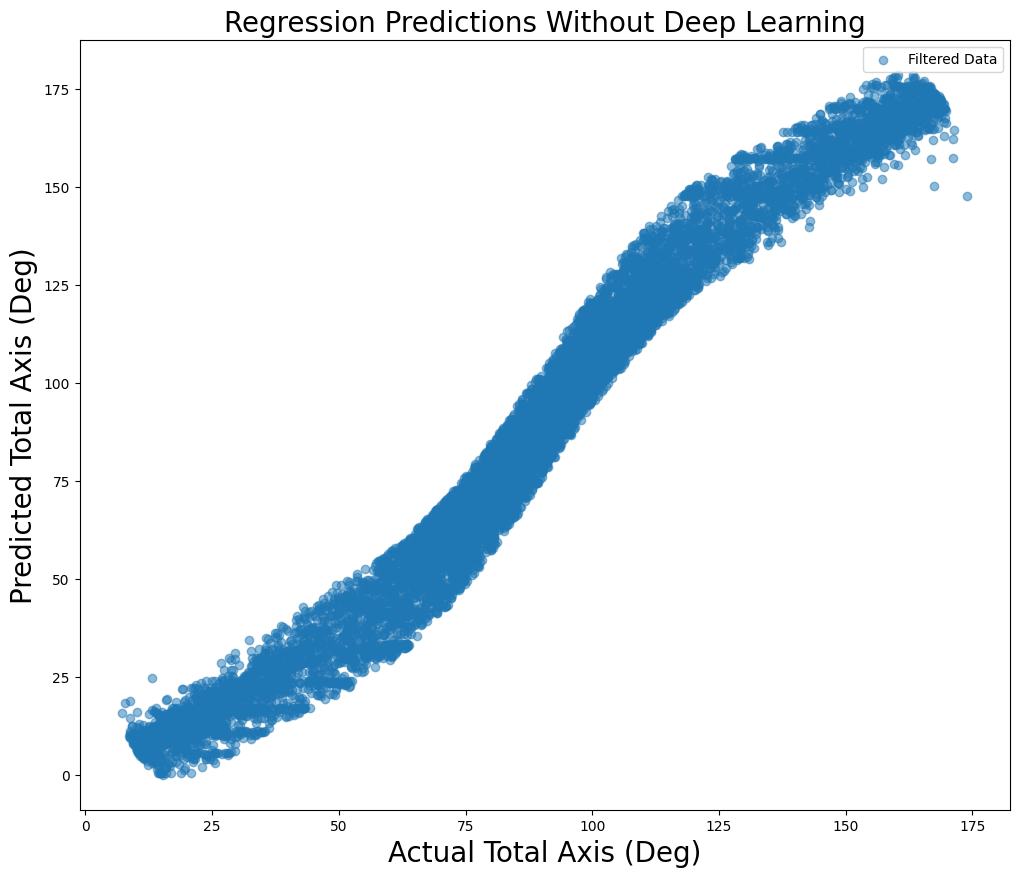

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df4 is your DataFrame

# Create a scatter plot
fig, ax = plt.subplots(figsize=(12, 10))
# Fit a cubic polynomial to the data
coefficients = np.polyfit(df4['Axis Total '], df4['Total Corneal Axis Final (reconstructed)'], 7)
p = np.poly1d(coefficients)

# Generate a range of x values for the curve
x_range = np.linspace(20, 155, 200)

# Calculate the corresponding y values for the cubic curve
y_curve = p(x_range)

# Plot the cubic curve
#ax.plot(x_range, y_curve, color='red', label='Cubic Fit')

# Calculate the residuals (vertical distances from data points to the curve)
residuals = df4['Total Corneal Axis Final (reconstructed)'] - p(df4['Axis Total '])

# Calculate the standard deviation of residuals
residual_std = np.std(residuals)

# Set a threshold for filtering points (2 standard deviations)
threshold = 0.5 * residual_std

# Filter out points more than 2 standard deviations away from the curve
filtered_df4 = df4[np.abs(residuals) <= threshold]

# Create a scatter plot of the filtered data points
ax.scatter(filtered_df4['Axis Total '], filtered_df4['Total Corneal Axis Final (reconstructed)'], alpha=0.5, label='Filtered Data')

# Set labels and title
ax.set_xlabel('Actual Total Axis (Deg)', size=20)
ax.set_ylabel('Predicted Total Axis (Deg)', size=20)
ax.set_title('Regression Predictions Without Deep Learning', size=20)
ax.legend()

# Show the plot
plt.show()

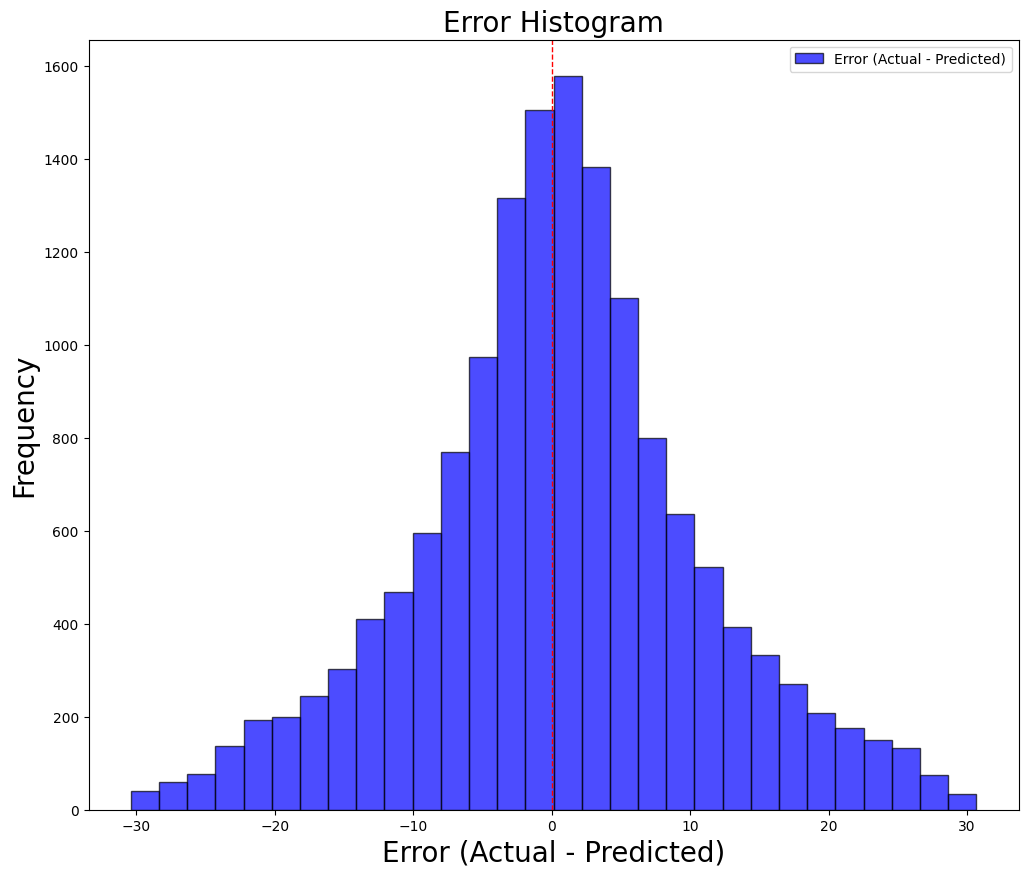

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df4 is your DataFrame

# Calculate the error (difference between actual and predicted)
error = filtered_df4['Axis Total '] - filtered_df4['Total Corneal Axis Final (reconstructed)']

# Create a histogram plot for the error
fig, ax = plt.subplots(figsize=(12, 10))
plt.hist(error, bins=30, color='blue', alpha=0.7, edgecolor='black', label='Error (Actual - Predicted)')

# Set labels and title
plt.xlabel('Error (Actual - Predicted)', size=20)
plt.ylabel('Frequency', size=20)
plt.title('Error Histogram', size=20)
plt.legend()
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)  # Add a vertical line at x=0 for reference
plt.show()

In [ ]:
df9 = pd.concat([df3['Axis Total '], df2['Total Corneal Axis Final (reconstructed)']], axis=1, keys=['df3', 'df2'])


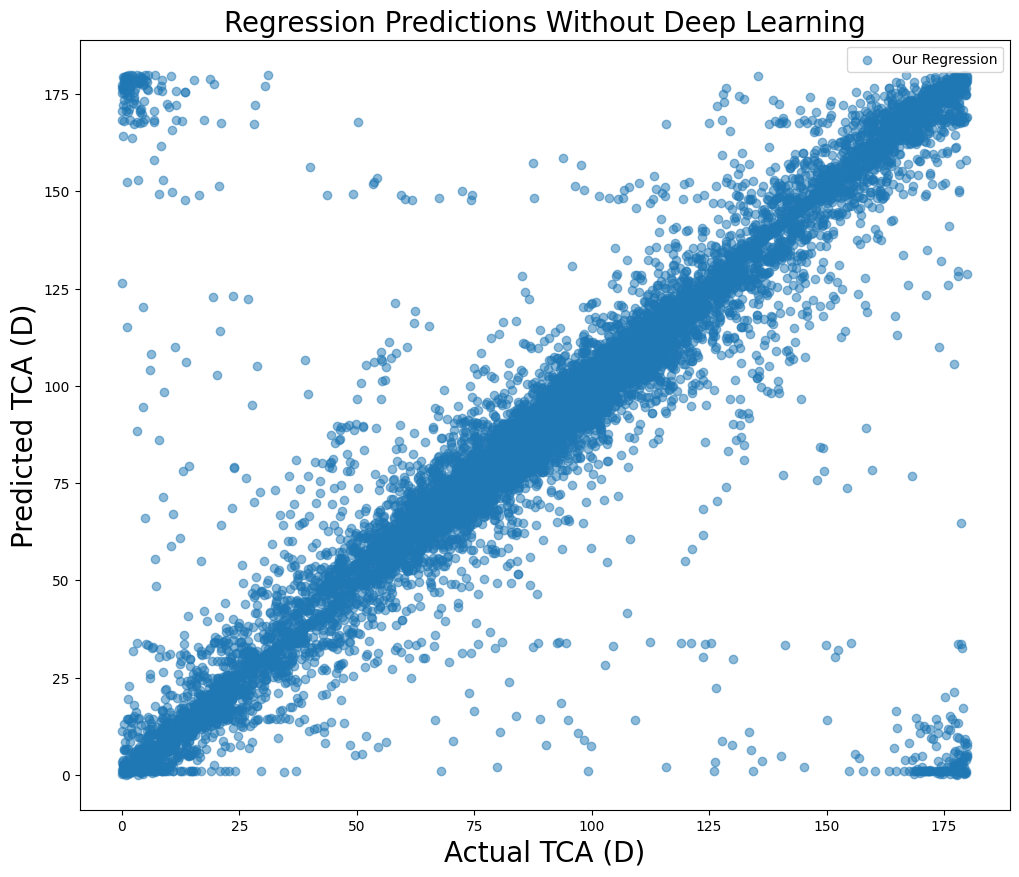

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df3 and df2 are your DataFrames

# Create a scatter plot
fig, ax = plt.subplots(figsize=(12, 10))

# Scatter plot of the actual vs. predicted values
plt.scatter(df3['Axis Total '], df2['Total Corneal Axis Final (reconstructed)'], alpha=0.5, label='Our Regression') # OURS

# Fit a cubic polynomial to the data
coefficients = np.polyfit(df3['Axis Total '], df2['Total Corneal Axis Final (reconstructed)'], 5)
p = np.poly1d(coefficients)

# Generate a range of x values for the cubic curve
x_range = np.linspace(20, 155, 200)

# Calculate the corresponding y values for the cubic curve
y_curve = p(x_range)

# Plot the cubic curve
#ax.plot(x_range, y_curve, color='red', label='Cubic Fit')

# Set labels and title
ax.set_xlabel('Actual TCA (D)', size=20)
ax.set_ylabel('Predicted TCA (D)', size=20)
ax.set_title('Regression Predictions Without Deep Learning', size=20)
ax.legend()

# Show the plot
plt.show()

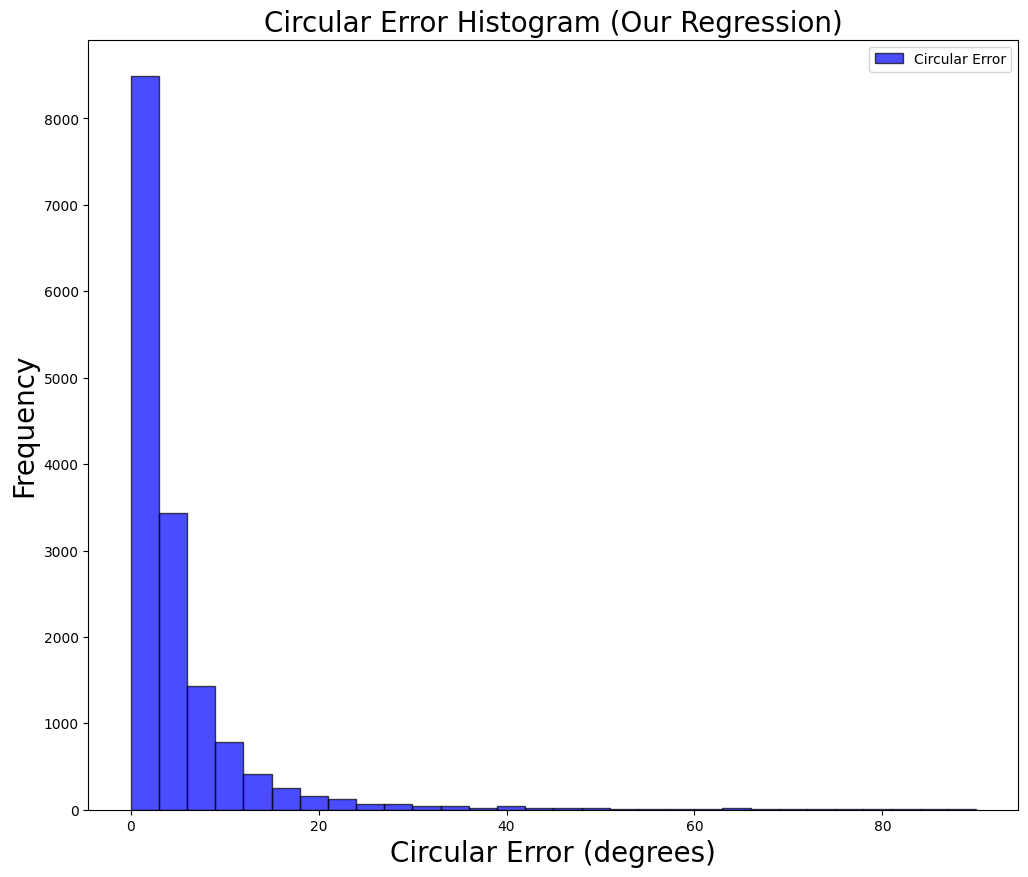

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df4 is your DataFrame

# Calculate the circular error (shortest angular distance) between actual and predicted
def circular_error(actual, predicted):
    error = np.abs(predicted - actual)
    return np.minimum(error, 180 - error)

# Calculate the circular error for the dataset
df4['Circular Error'] = circular_error(df3['Axis Total '], df2['Total Corneal Axis Final (reconstructed)'])

# Create a histogram plot for the circular error
fig, ax = plt.subplots(figsize=(12, 10))
plt.hist(df4['Circular Error'], bins=30, color='blue', alpha=0.7, edgecolor='black', label='Circular Error')

# Set labels and title
plt.xlabel('Circular Error (degrees)', size=20)
plt.ylabel('Frequency', size=20)
plt.title('Circular Error Histogram (Our Regression)', size=20)
plt.legend()
#plt.axvline(x=0, color='red', linestyle='--', linewidth=1)  # Add a vertical line at x=0 for reference
plt.show()

In [ ]:
import pandas as pd

# Assuming you have a circular_error() function
# Calculate Circular Error based on data from df3 and df2
circular_error_values = circular_error(df3['Axis Total '], df2['Total Corneal Axis Final (reconstructed)'])

# Create df5 with the 'Circular Error' column
#df5 = pd.DataFrame({'Circular Error': circular_error_values})

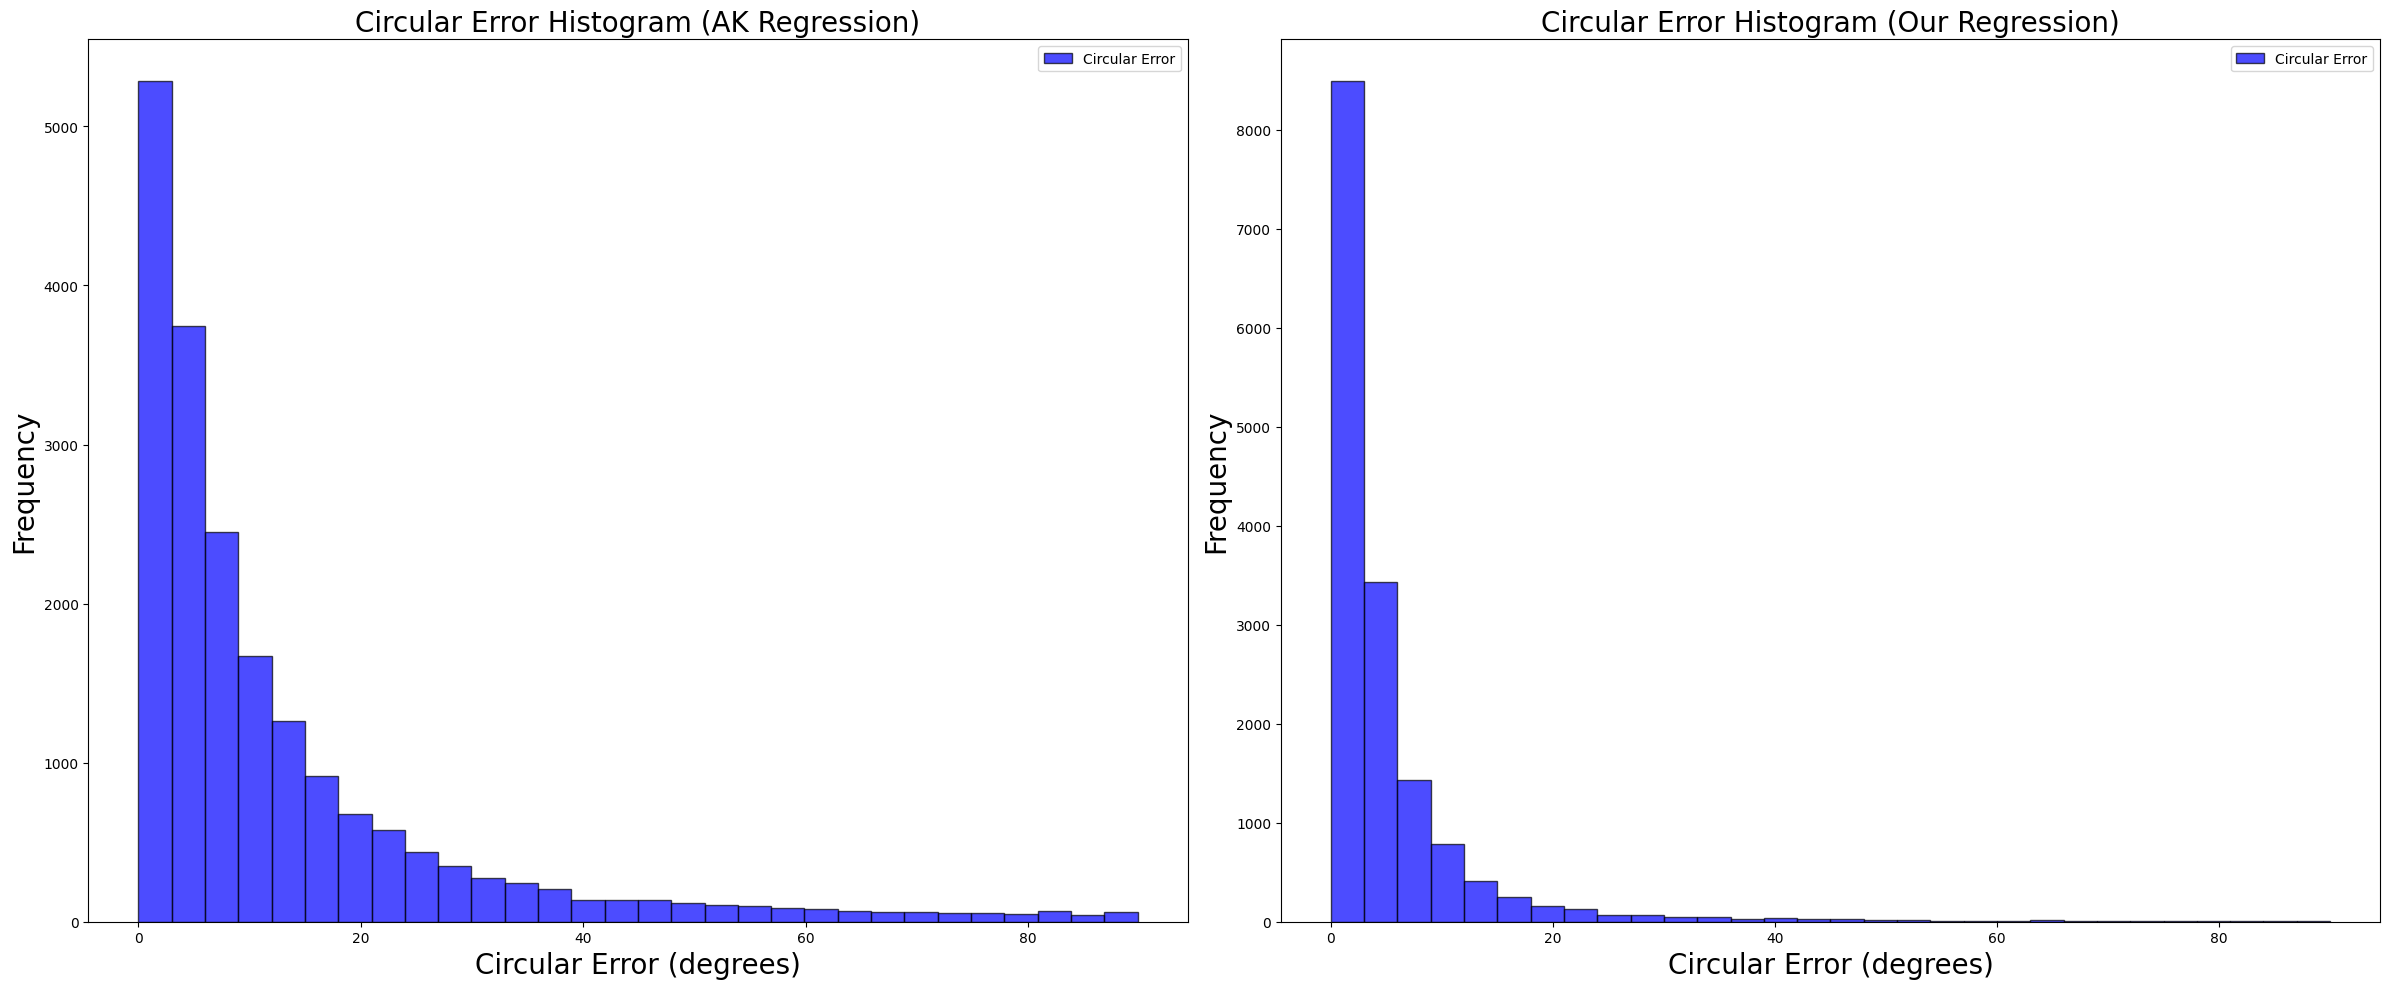

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots arranged in a single row and two columns
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# First subplot on the left
plt.sca(axes[0])
plt.hist(df4['Circular Error'], bins=30, color='blue', alpha=0.7, edgecolor='black', label='Circular Error')
plt.xlabel('Circular Error (degrees)', size=20)
plt.ylabel('Frequency', size=20)
plt.title('Circular Error Histogram (AK Regression)', size=20)
plt.legend()

# Second subplot on the right
plt.sca(axes[1])
plt.hist(circular_error_values, bins=30, color='blue', alpha=0.7, edgecolor='black', label='Circular Error')
plt.xlabel('Circular Error (degrees)', size=20)
plt.ylabel('Frequency', size=20)
plt.title('Circular Error Histogram (Our Regression)', size=20)
plt.legend()

# Adjust the layout to avoid overlapping titles and labels
plt.tight_layout()

# Display the plots
plt.show()

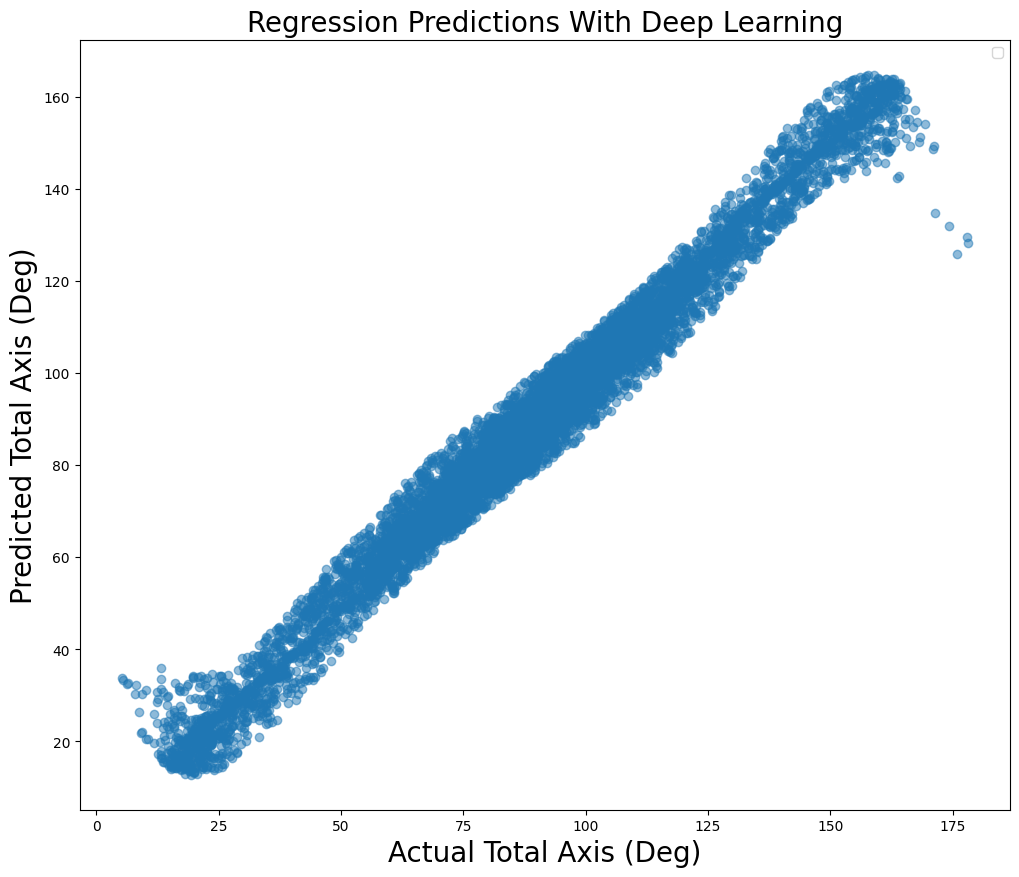

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df3 and df2 are your DataFrames

# Create a scatter plot
fig, ax = plt.subplots(figsize=(12, 10))

# Scatter plot of the actual vs. predicted values
#plt.scatter(df3['Axis Total '], df2['Total Corneal Axis Final (reconstructed)'], alpha=0.5, label='Our Regression') # OURS

# Fit a cubic polynomial to the data
coefficients = np.polyfit(df3['Axis Total '], df2['Total Corneal Axis Final (reconstructed)'], 5)
p = np.poly1d(coefficients)

# Generate a range of x values for the cubic curve
x_range = np.linspace(20, 155, 200)

# Calculate the corresponding y values for the cubic curve
y_curve = p(x_range)

# Plot the cubic curve
#ax.plot(x_range, y_curve, color='red', label='Cubic Fit')

# Calculate the residuals (vertical distances from data points to the curve)
residuals = df2['Total Corneal Axis Final (reconstructed)'] - p(df3['Axis Total '])

# Calculate the standard deviation of residuals
residual_std = np.std(residuals)

# Set a threshold for filtering points (2 standard deviations)
threshold = 0.5 * residual_std

# Reset the index of DataFrames
df2.reset_index(drop=True, inplace=True)
df3.reset_index(drop=True, inplace=True)

# Create a mask to filter out points more than 2 standard deviations away
mask = np.abs(residuals) <= threshold

# Apply the mask to both x and y data
x_filtered = df3['Axis Total '][mask]
y_filtered = df2['Total Corneal Axis Final (reconstructed)'][mask]

# Set labels and title
ax.set_xlabel('Actual Total Axis (Deg)', size=20)
ax.set_ylabel('Predicted Total Axis (Deg)', size=20)
ax.set_title('Regression Predictions With Deep Learning', size=20)
ax.legend()

# Show the plot with filtered data
plt.scatter(x_filtered, y_filtered, alpha=0.5, label='Filtered Data')
plt.show()

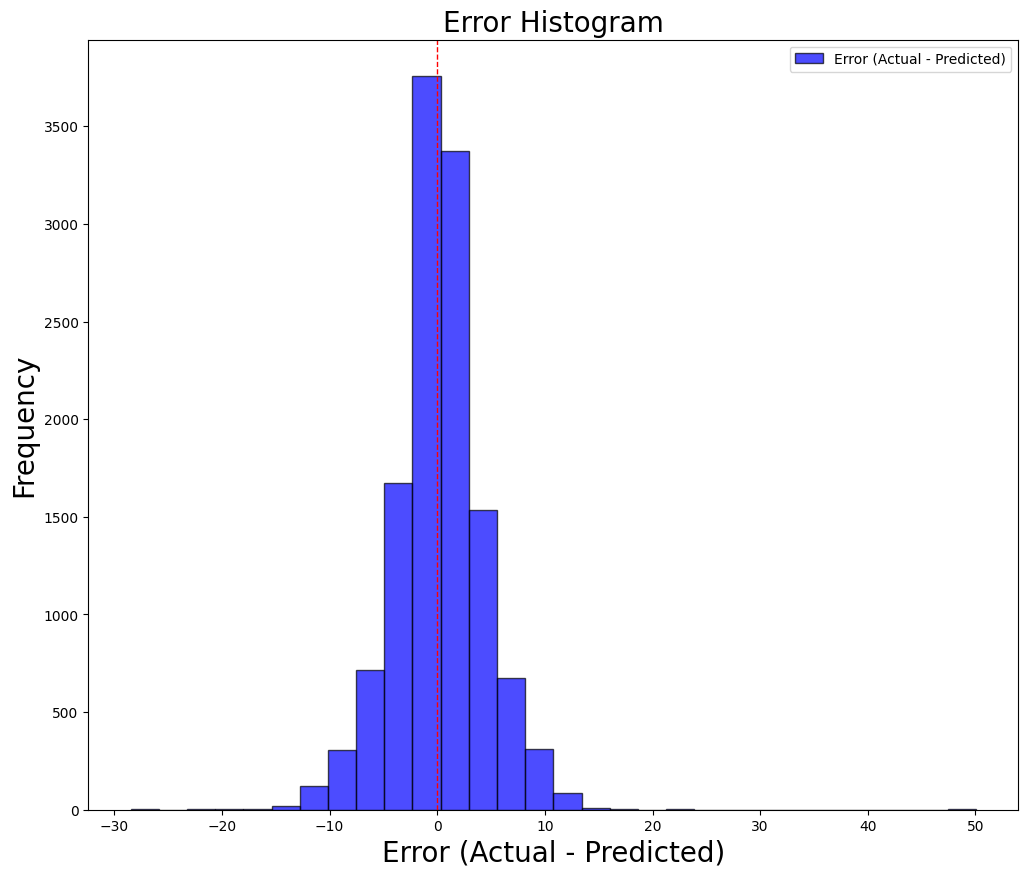

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df4 is your DataFrame

# Calculate the error (difference between actual and predicted)
error = x_filtered - y_filtered

# Create a histogram plot for the error
fig, ax = plt.subplots(figsize=(12, 10))
plt.hist(error, bins=30, color='blue', alpha=0.7, edgecolor='black', label='Error (Actual - Predicted)')

# Set labels and title
plt.xlabel('Error (Actual - Predicted)', size=20)
plt.ylabel('Frequency', size=20)
plt.title('Error Histogram', size=20)
plt.legend()
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)  # Add a vertical line at x=0 for reference
plt.show()

ValueError: ignored

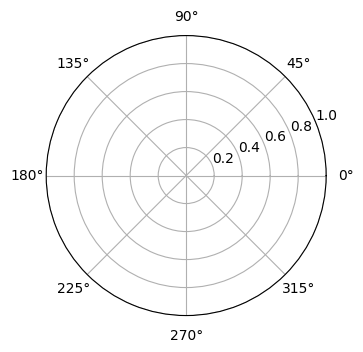

In [ ]:
# Create a polar scatter plot for actual axis values
plt.figure(figsize=(8, 8))
ax1 = plt.subplot(211, polar=True)
#ax1.scatter(np.radians(y2_test), np.ones_like(y2_test), c='blue', label='Actual Axis')
ax1.scatter(np.radians(df2['Total Corneal Axis Final (reconstructed)']), df4['Axis Total '], c='blue', label='Actual Axis')
ax1.set_yticklabels([])  # Hide radial axis labels
ax1.set_xticklabels([])  # Hide angular axis labels
ax1.set_rticks([])       # Hide radial ticks

plt.tight_layout()
plt.show()

In [ ]:
df4

In [ ]:
# If axis over 90 subtract 180 then take the abs to take care of negative values and add back the original axis
# Define a custom function to apply the logic
def update_col_1(value):
    if value > 90:
        return abs(value - 180)
    else:
        return value

# Apply the custom function to the 'col_1' column
df4['New Total Axis.1'] = df4['New Total Axis.1'].apply(update_col_1)
df4['Axis Total '] = df4['Axis Total '].apply(update_col_1)
df2['Total Corneal Axis Final (reconstructed)'] = df2['Total Corneal Axis Final (reconstructed)'].apply(update_col_1)
df2['Axis Total ']= df2['Axis Total '].apply(update_col_1)
df5['New Total Axis.1'] = df5['New Total Axis.1'].apply(update_col_1)

KeyError: ignored

In [ ]:
df5

In [ ]:
### DEEP LEARNING TIMEEEEEE

columns_to_keep = ['Age', 'Astig F (D):', 'Axis F:']  # Replace with the actual column names you want to keep 'Astig Total (D):'

X2 = df5[columns_to_keep].values
y2 = df5['New Total Axis.1'].values
#y2 = df4['Axis Total '].values

#X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

NameError: ignored

In [ ]:
X2_train = torch.tensor(X2, dtype=torch.float32)
y2_train = torch.tensor(y2, dtype=torch.float32)

NameError: ignored

In [ ]:
class RegressionModel2(nn.Module):
    def __init__(self, input_dim2, hidden_dim2, output_dim2):
        super(RegressionModel2, self).__init__()
        self.fc1 = nn.Linear(input_dim2, hidden_dim2)
        self.relu1 = nn.ReLU()  # ReLU activation function
        self.fc2 = nn.Linear(hidden_dim2, output_dim2)
        self.batch_norm1 = nn.BatchNorm1d(hidden_dim2)  # Batch normalization

    def forward(self, x2):
        out = self.fc1(x2)
        out = self.relu1(out)
        out = self.batch_norm1(out)
        out = self.fc2(out)
        return out

In [ ]:
input_dim2 = X2_train.shape[1] # change to [1] for pentacam dataset X_train.shape[1]
hidden_dim2 = 64 # Was 16
output_dim2 = 1

model2 = RegressionModel2(input_dim2, hidden_dim2, output_dim2)

In [ ]:
criterion2 = nn.MSELoss()
optimizer2 = optim.Adam(model2.parameters(), lr=0.1, weight_decay=1e-5)

In [ ]:
from sklearn.metrics import r2_score

num_epochs = 500

# initialize lists to store loss and accuracy values
train_loss = []
train_accuracy = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model2(X2_train)
    loss = criterion2(outputs, y2_train.unsqueeze(1))

    # calculate accuracy
    accuracy = r2_score(y2_train.numpy(), outputs.detach().numpy())

    # Backward and optimize
    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()

    # append loss and accuracy values to lists
    train_loss.append(loss.item())
    train_accuracy.append(accuracy)

    if (epoch + 1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}, Train Accuracy: {:.4f}'.format(epoch + 1, num_epochs, loss.item(), accuracy))

# Print the final train accuracy
final_train_accuracy = train_accuracy[-1]
print('Final Train Accuracy: {:.4f}'.format(final_train_accuracy))

In [ ]:
# Load test dataset from Excel file
test_df = pd.read_excel('axis_test_set.xlsx').dropna()

# Specify the column names you want to include in X2_test
columns_to_keep = ['Age', 'Astig F (D):', 'Axis F:']  # Replace with the actual column names you want to keep

# Extract features (X) and target (y) from test dataset based on columns_to_keep
X2_test = torch.tensor(test_df[columns_to_keep].values, dtype=torch.float32)
#y2_test = torch.tensor(test_df['Axis Total '].values, dtype=torch.float32)
y2_test = torch.tensor(test_df['New Total Axis.1'].values, dtype=torch.float32)

In [ ]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Use the trained model to make predictions on the test data
model2.eval()
with torch.no_grad():
    test_outputs = model2(X2_test)
model2.train()

# Calculate test loss (MSE)
criterion2 = nn.MSELoss()
test_loss = criterion2(test_outputs, y2_test.unsqueeze(1)).item()

# Calculate R-squared (test accuracy)
test_r2 = r2_score(y2_test.numpy(), test_outputs.numpy())

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y2_test.numpy(), test_outputs.numpy()))

print('Test Loss (MSE): {:.4f}'.format(test_loss))
print('Test Accuracy (R-squared): {:.4f}'.format(test_r2))
print('RMSE: {:.4f}'.format(rmse))

In [ ]:
# Plot the actual vs predicted values
# If axis over 90 subtract 180 then take the abs to take care of negative values and add back the original axis
with torch.no_grad():
    model2.eval()
    test_outputs = model2(X2_train)
    #plt.scatter(df2['Axis Total '],df2['Total Corneal Axis Final (reconstructed)'], alpha=0.5)
    plt.scatter(y2_train.numpy(), test_outputs.numpy(), alpha=0.5)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.show()
    model2.train()

In [ ]:
# Convert the tensor values to numpy arrays
y2_test = y2_test.numpy()
test_outputs = test_outputs.numpy()

In [ ]:
# Create polar histogram for actual axis values
plt.figure(figsize=(8, 8))
plt.subplot(211, polar=True)
plt.hist(np.radians(y2_test), bins=12, color='blue', label='Actual Axis')
plt.hist(np.radians(test_outputs), bins=12, color='red', alpha=0.25, label='Predicted Axis')
plt.title('Actual Vs. Predicted Axis Values', va='bottom')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
max(y2_test), max(test_outputs), max(df2['Axis Total ']), max(df2['Total Corneal Axis Final (reconstructed)'])

In [ ]:
np.radians(df2['Total Corneal Axis Final (reconstructed)'])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a polar scatter plot for actual axis values
plt.figure(figsize=(8, 8))
ax1 = plt.subplot(211, polar=True)

# Set custom degree axis labels
degree_labels = np.arange(0, 360, 30)  # Customize as needed
ax1.set_xticks(np.radians(degree_labels))
ax1.set_xticklabels(degree_labels)

# Plot the actual axis values
ax1.scatter(np.radians(df2['Total Corneal Axis Final (reconstructed)']), df2['Axis Total '], c='blue', label='AK Axis')
ax1.scatter(np.radians(y2_test), test_outputs, c='red', label='Predicted Axis', alpha=0.1)

ax1.set_yticklabels([])  # Hide radial axis labels
ax1.set_rticks([])       # Hide radial ticks

plt.title('AK Vs. Predicted Axis Values', va='bottom')
ax1.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
array = np.array([68.3, 61.0, 52.8],dtype=float)
grad = np.gradient(array)
grad

In [ ]:
def construct_gradient(gradient_values):
  """Constructs a gradient vector.

  Args:
    gradient_values: A list of three values representing the gradient vector.

  Returns:
    A numpy array containing the gradient vector.
  """

  # Check if the gradient vector is normalized
  gradient_magnitude = np.linalg.norm(gradient_values)
  if gradient_magnitude == 1:
    # The gradient vector is normalized
    return np.array(gradient_values)
  else:
    # The gradient vector is not normalized
    # Normalize the gradient vector
    gradient_vector = np.array(gradient_values) / gradient_magnitude
    return gradient_vector

In [ ]:
construct_gradient(array)
# Convert the gradient array to a numpy array
gradient_array = np.array([68.3, 61.0, 52.8])

# Repeat the gradient array for each dimension of the vector field
#radient_array_repeated = np.repeat(gradient_array, 3, axis=0)
vector_field = gradient_array

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the vector field
ax.quiver(vector_field[..., 0], vector_field[..., 1], vector_field[..., 2])

# Set the axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()
